In [1]:
import graphIO
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
DATA_DIR = "data/"
DATASET_DIR = DATA_DIR + "curvatures/"
MAPPINGS_FILEPATH = DATA_DIR + "region_name_mapping.json"
METHOD = 'lrc'
AD_MAT_DIR = DATASET_DIR + f"AD-50/{METHOD}_proc/"
CN_MAT_DIR = DATASET_DIR + f"CN-50/{METHOD}_proc/"
RANDOM_STATE = 33
ASYMMETRY_METHOD = "abs_diff"

In [3]:
AD_matrices = graphIO.read_sp_adj_matrices_from_directory(AD_MAT_DIR, include_string=f"{METHOD}_proc")
CN_matrices = graphIO.read_sp_adj_matrices_from_directory(
    CN_MAT_DIR, include_string=f"{METHOD}_proc")
region_name_mappings = graphIO.read_mappings_from_json(MAPPINGS_FILEPATH)
reverse_region_name_mappings = {v: k for k, v in region_name_mappings.items()}
print(f'AD matrices: {len(AD_matrices)}, CN matrices: {len(CN_matrices)}, mappings: {len(region_name_mappings)}')

AD matrices: 50, CN matrices: 50, mappings: 160


In [4]:
AD_TEST_MATRIX = np.array(list(AD_matrices.values())[random.randint(0, len(AD_matrices) - 1)])
CN_TEST_MATRIX = np.array(list(CN_matrices.values())[random.randint(0, len(CN_matrices) - 1)])  

In [5]:
shape = (len(region_name_mappings.keys()), len(region_name_mappings.keys()))
print(f'Expected matrix shape: {shape}')
for ad_matrix in AD_matrices.values():
    if ad_matrix.shape != shape:
        raise ValueError(f'AD matrix shape: {ad_matrix.shape}')
for cn_matrix in CN_matrices.values():
    if cn_matrix.shape != shape:
        raise ValueError(f'CN matrix shape: {cn_matrix.shape}')
print('All matrices have the expected shape.')

Expected matrix shape: (160, 160)
All matrices have the expected shape.


In [6]:
lh_regions = []
rh_regions = []
for value in region_name_mappings.values():
    if 'lh' in value:
        lh_regions.append(value)
    else:
        rh_regions.append(value)
print(f'lh regions: {len(lh_regions)}, rh regions: {len(rh_regions)}')

lh regions: 80, rh regions: 80


In [7]:
for lh_region in lh_regions:
    lh_region_test = lh_region.replace('lh', 'rh')
    if lh_region_test not in rh_regions:
        raise ValueError(f"No corresponding region found for {lh_region}")
print('All Left Hemisphere regions have corresponding Right Hemisphere regions')

All Left Hemisphere regions have corresponding Right Hemisphere regions


In [8]:
print(lh_regions)
print(rh_regions)
print(reverse_region_name_mappings)

['ctx_lh_G_and_S_frontomargin', 'ctx_lh_G_and_S_occipital_inf', 'ctx_lh_G_and_S_paracentral', 'ctx_lh_G_and_S_subcentral', 'ctx_lh_G_and_S_transv_frontopol', 'ctx_lh_G_and_S_cingul-Ant', 'ctx_lh_G_and_S_cingul-Mid-Ant', 'ctx_lh_G_and_S_cingul-Mid-Post', 'ctx_lh_G_cingul-Post-dorsal', 'ctx_lh_G_cingul-Post-ventral', 'ctx_lh_G_cuneus', 'ctx_lh_G_front_inf-Opercular', 'ctx_lh_G_front_inf-Orbital', 'ctx_lh_G_front_inf-Triangul', 'ctx_lh_G_front_middle', 'ctx_lh_G_front_sup', 'ctx_lh_G_Ins_lg_and_S_cent_ins', 'ctx_lh_G_insular_short', 'ctx_lh_G_occipital_middle', 'ctx_lh_G_occipital_sup', 'ctx_lh_G_oc-temp_lat-fusifor', 'ctx_lh_G_oc-temp_med-Lingual', 'ctx_lh_G_oc-temp_med-Parahip', 'ctx_lh_G_orbital', 'ctx_lh_G_pariet_inf-Angular', 'ctx_lh_G_pariet_inf-Supramar', 'ctx_lh_G_parietal_sup', 'ctx_lh_G_postcentral', 'ctx_lh_G_precentral', 'ctx_lh_G_precuneus', 'ctx_lh_G_rectus', 'ctx_lh_G_subcallosal', 'ctx_lh_G_temp_sup-G_T_transv', 'ctx_lh_G_temp_sup-Lateral', 'ctx_lh_G_temp_sup-Plan_polar', 

In [9]:
# Test the asymmetry method between regions for a list of matrices
ad_lh_curves = []
ad_rh_curves = []
ad_abs_diffs = []

for curvature_matrix in list(AD_matrices.values()):
    lh_curves_temp = []
    rh_curves_temp = []
    abs_diff_temp = []
    
    for lh_region, rh_region in zip(lh_regions, rh_regions):
        if ASYMMETRY_METHOD == "abs_diff":
            lh_curves_temp.append(
                curvature_matrix[reverse_region_name_mappings[lh_region]-1].sum())
            rh_curves_temp.append(
                curvature_matrix[reverse_region_name_mappings[rh_region]-1].sum())
            abs_diff_temp.append(abs(lh_curves_temp[-1] - rh_curves_temp[-1]))
    
    ad_lh_curves.append(lh_curves_temp)
    ad_rh_curves.append(rh_curves_temp)
    ad_abs_diffs.append(abs_diff_temp)

ad_abs_diffs = np.array(ad_abs_diffs).mean(axis=0)

cn_lh_curves = []
cn_rh_curves = []
cn_abs_diffs = []

for curvature_matrix in list(CN_matrices.values()):
    lh_curves_temp = []
    rh_curves_temp = []
    abs_diff_temp = []
    
    for lh_region, rh_region in zip(lh_regions, rh_regions):
        if ASYMMETRY_METHOD == "abs_diff":
            lh_curves_temp.append(
                curvature_matrix[reverse_region_name_mappings[lh_region]-1].sum())
            rh_curves_temp.append(
                curvature_matrix[reverse_region_name_mappings[rh_region]-1].sum())
            abs_diff_temp.append(abs(lh_curves_temp[-1] - rh_curves_temp[-1]))
    
    cn_lh_curves.append(lh_curves_temp)
    cn_rh_curves.append(rh_curves_temp)
    cn_abs_diffs.append(abs_diff_temp)

cn_abs_diffs = np.array(cn_abs_diffs).mean(axis=0)


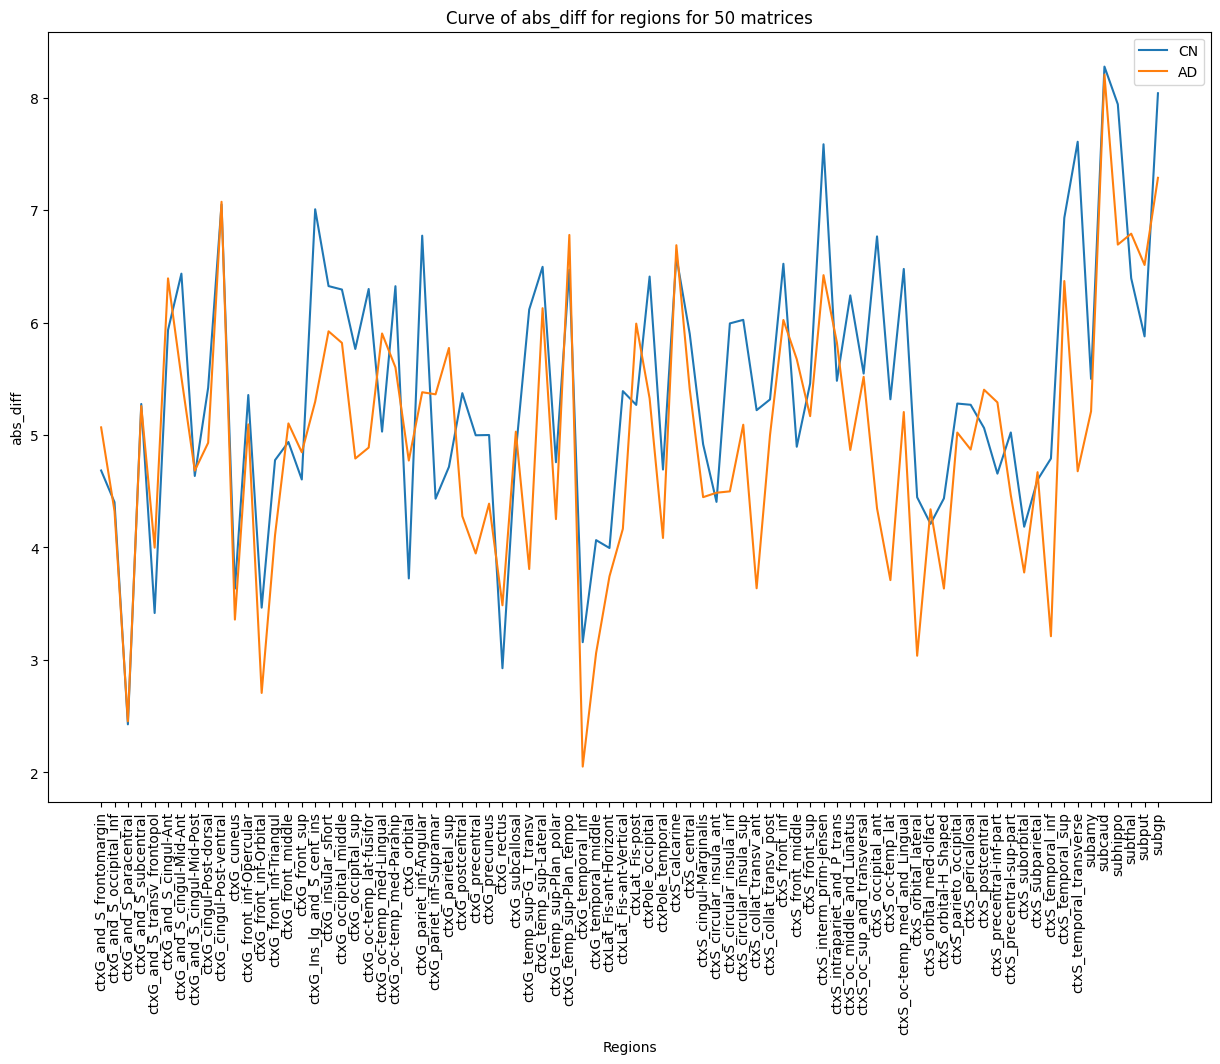

In [16]:
# Remove '_lh_' from lh_regions
region_labels = [region.replace('_lh_', '') for region in lh_regions]

# Plot the curve
plt.figure(figsize=(15, 10))
plt.plot(region_labels, cn_abs_diffs, label='CN')
plt.plot(region_labels, ad_abs_diffs, label='AD')
plt.xlabel('Regions')
plt.ylabel(f'{ASYMMETRY_METHOD}')
plt.title(f'Curve of {ASYMMETRY_METHOD} for regions for {len(AD_matrices)} matrices')
plt.xticks(rotation=90)
plt.legend()
plt.show()